In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

## Let us generate simple dataset for UE methods testing

## 0) Generate gaussian 2d random variable

In [53]:
c1 = multivariate_normal([2, -2], [[2.0, 0.3], [0.3, 1.5]])
c2 = multivariate_normal([0.5, 2], [[3.0, 0], [0, 0.5]])
c3 = multivariate_normal([-0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])

In [54]:
np.random.seed(seed=3)
n_points = 50
c1_samples = c1.rvs(n_points)
c2_samples = c2.rvs(n_points)
c3_samples = c3.rvs(n_points)

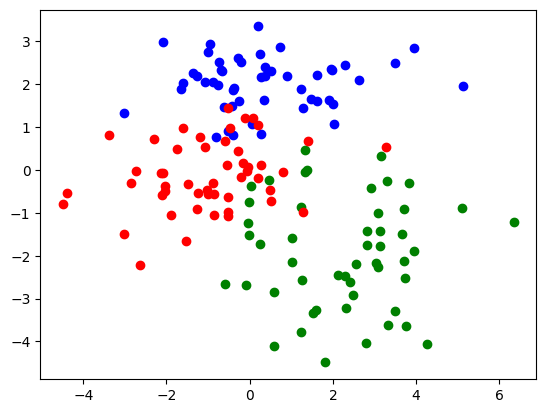

In [55]:
plt.scatter(c1_samples[:,0], c1_samples[:,1], c='green')
plt.scatter(c2_samples[:,0], c2_samples[:,1], c='blue')
plt.scatter(c3_samples[:,0], c3_samples[:,1], c='red')

array([[ 1.28422571,  0.58163879],
       [-0.11033835, -0.95713838],
       [-1.60792229, -0.27746384],
       [-1.13482106,  0.24398842],
       [ 1.54833765, -0.44813872]])